<a href="https://colab.research.google.com/github/jwoonge/ML-algorithms/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20141261 송제웅  
# 01 Linear Regression

## - function definition
[1] result(1) 출력을 위한 Linear function

In [0]:
import numpy as np
import matplotlib.pylab as plt

def linear_function(x_s, a, b):
    y_s = []
    for i in range(len(x_s)):
        y = a*x_s[i] + b
        y_s.append(y)
    return y_s

[2] 주어진 range를 $y=ax+b+n$(평균 0, 표준편차 $\sigma$의 랜덤 변수 n)으로 매칭시키는 함수



In [0]:
def random_generation(x_range, a, b):
    ret = []
    n = np.random.randn(len(x_range))
    for i in range(len(x_range)):
        y = a* x_range[i] + b + n[i]
        ret.append(y)
    return ret

[3] object function $J(\theta ) = {1\over2m}\sum_{i=1}^N{(h_\theta({x}_{i})-{y}_{i})^2}$  및 그 구현을 위한 linear model

In [0]:
def linear_model(theta0, theta1, x):
    return theta0 + theta1 * x

def object_function(theta0, theta1, x_range, datas):
    ret = 0
    for i in range(len(x_range)):
        ret += (linear_model(theta0, theta1, x_range[i]) - datas[i])**2
    ret /= 2*(len(x_range))
    return ret

[4] gradient descent  
이전의 $\theta$ 값들 및 데이터 y_s로부터 새로운 $\theta$들을 도출한다    

$\theta_0(t+1) =\theta_0(t) -{\alpha}{1\over{m}} \sum_{i=1}^{m}(h_\theta (x_i)−y_i)$  

$\theta_1(t+1) =\theta_1(t) -{\alpha}{1\over{m}} \sum_{i=1}^{m}((h_\theta (x_i)−y_i)*x_i)$

In [0]:
def gradient_descent(theta0, theta1, x_s, y_s, learning_rate = 0.03):
    update_theta0 = 0
    for i in range(len(x_s)):
        update_theta0 += (linear_model(theta0, theta1, x_s[i]) - y_s[i])/len(x_s)

    update_theta1 = 0
    for i in range(len(x_s)):
        update_theta1 += ((linear_model(theta0, theta1, x_s[i]) - y_s[i]) * x_s[i])/len(x_s)

    theta0_new = theta0 - learning_rate * update_theta0
    theta1_new = theta1 - learning_rate * update_theta1

    return theta0_new, theta1_new

[5] : 종료 조건인 convergence함을 판별하기 위한 boolean 함수  
theta 값 두 가지의 변동률이 convergence rate 보다 작아지면 convergence로 판별한다  

In [0]:
def convergence(theta0, theta1, t, convergence_rate = 0.000001):
    if theta0[t-1]==0 or theta1[t-1]==0:
        return False
    if np.abs((theta0[t]-theta0[t-1])/theta0[t-1]) < convergence_rate:
        if np.abs((theta1[t]-theta1[t-1])/theta1[t-1]) < convergence_rate:
            return True
    return False



## - Main

In [0]:
a=3
b=-2
m = 1000
x_range = [0.01*i for i in range(m)]
datas = random_generation(x_range, a=a, b=b)

$y = 3x-2$의 초기 일차 함수를 바탕으로 평균 0, 표준편차 $\sigma$, 0-10을 m(=1000)개로 나눈 0.01간격의 range에서 random data를 생성 (func[2]) 한다.

In [0]:
t=0
theta0 = [0]
theta1 = [1]
energy = []
energy.append(object_function(theta0[t],theta1[t],x_range,datas))

반복문을 위한 초기 조건 설정  
$\theta_0$ 는 0, $\theta_1$은 1부터 gradient descent (func[4] )를 실행

In [0]:
while True:
    theta0_new, theta1_new = gradient_descent(theta0[t], theta1[t], x_range, datas)
    theta0.append(theta0_new)
    theta1.append(theta1_new)
    t += 1
    energy.append(object_function(theta0[t],theta1[t],x_range,datas))
    if convergence(theta0, theta1,t):
        break

min_t = energy.index(min(energy))

gradient descent로 optimization을 하는 반복문  
1회의 반복이 한 번의 최적화 단계가 된다.  
convergence (func[5])하게 되면 중지하고, 가장 object function의 값이 작았던 시점을 기억한다.  
    

## - Result
  
  [1] input data


*   a straight line that is the graph of a linear function (in blue color)
*   a set of points that have random perturbations with respect to the straight line (in black color)



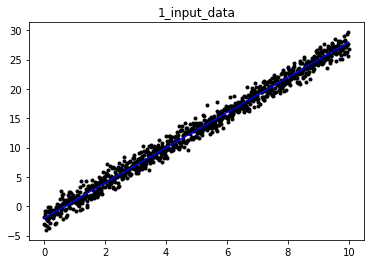

In [44]:
plt.title("1_input_data")
plt.plot(x_range, datas, 'k.')
plt.plot(x_range, linear_function(x_range, a=a, b=b), 'b')
plt.show()

[2] output results


*   the set of points that have random pertubations with respect to the straight line (in black color)
*   a straight line that is the graph of a solution obtained by linear regression (in red color)



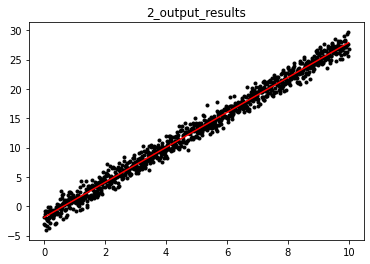

In [45]:
plt.title("2_output_results")
plt.plot(x_range, datas, 'k.')
plt.plot(x_range, linear_function(x_range, theta1[min_t], theta0[min_t]), 'r')
plt.show()

[3] plotting the energy values


*   the value of the object function at every optimization step by the gradient descent algorithm (in blue color)
*   the optimization should be performed until convergence



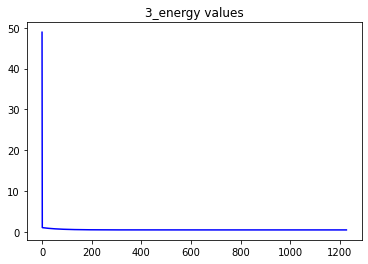

In [46]:
plt.title("3_energy values")
plt.plot(energy, 'b')
plt.show()

[4] plotting the model parameters


*   the value of the model parameters $\theta_0$ and $\theta_1$ at every optimization step (in red $\theta_0$ and blue $\theta_1$ colors)
*   the optimization should be performed until convergence



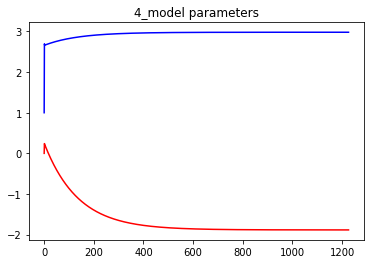

In [47]:
plt.title("4_model parameters")
plt.plot(theta0, 'r')
plt.plot(theta1, 'b')
plt.show()

[5] optimized iterators, $\theta_0$, $\theta_1$

In [48]:
print("t:",min_t,"  theta0:",theta0[min_t],"  theta1:",theta1[min_t])

t: 1226   theta0: -1.8836390998746113   theta1: 2.9801469303633468
